In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
from google.colab import files
data = files.upload()

Saving kaggle_Interests_group.csv to kaggle_Interests_group.csv


In [4]:
df = pd.read_csv('kaggle_Interests_group.csv')

In [5]:
df.head(5)

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [6]:
df.fillna(0, inplace = True)

In [7]:
df.shape

(6340, 219)

In [8]:
x = df.iloc[:,2:]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

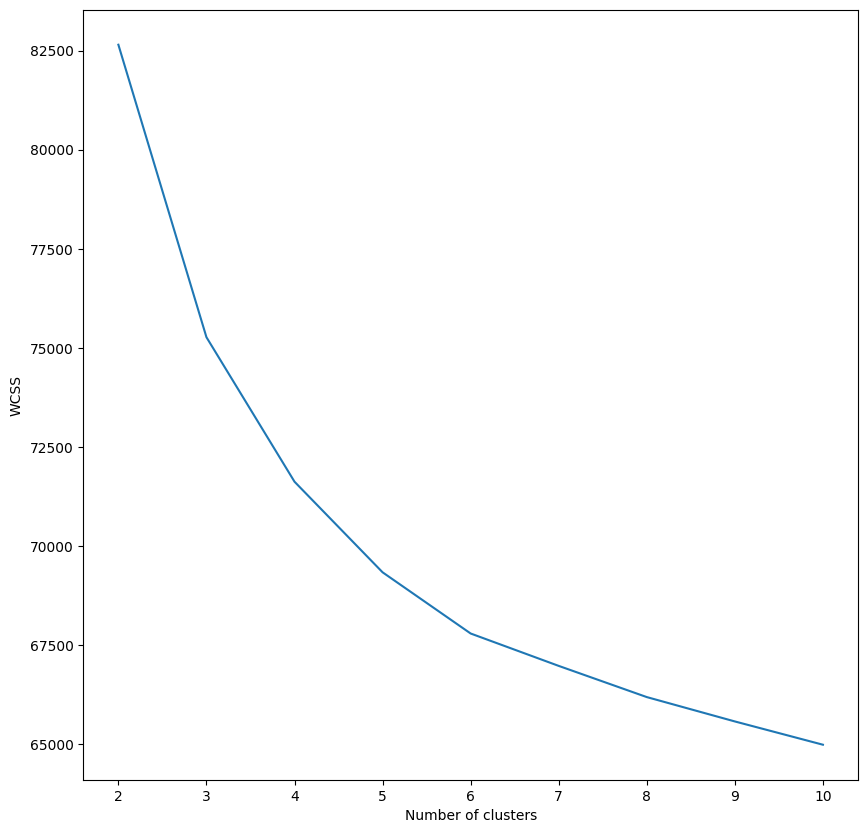

In [11]:
wcss = []
for i in range(2,11):
    model = KMeans(n_clusters = i, init = "k-means++")
    model.fit(x)
    wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(2,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Next step is to convert our dataset from multidimensions to 2 dimensions.

In [9]:
pca = PCA(3)
data = pca.fit_transform(x)

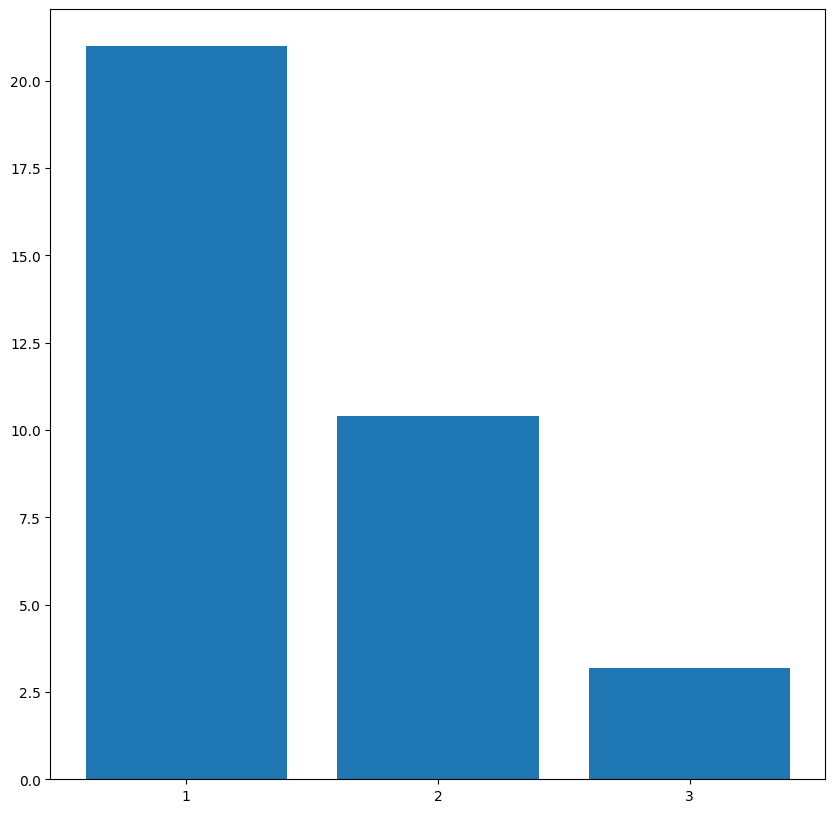

In [10]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

In [37]:
data

array([[-2.250315  , -0.23157677,  0.49265908],
       [ 0.56768376,  1.30488631,  0.96693931],
       [-0.92715419, -0.90064046,  0.19827803],
       ...,
       [ 1.46439732, -0.24863051,  0.56526965],
       [ 0.17146907,  1.17298743, -0.04009553],
       [ 2.60974517,  2.12629243, -1.33015823]])

This PCA reduction explains 34.6% of the data variance. We need more fetures in order to have more data explain by the model. 

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.21031967, 0.31466753, 0.34670574])

In [28]:
pca_20= PCA(20)
data_20 = pca_20.fit_transform(x)

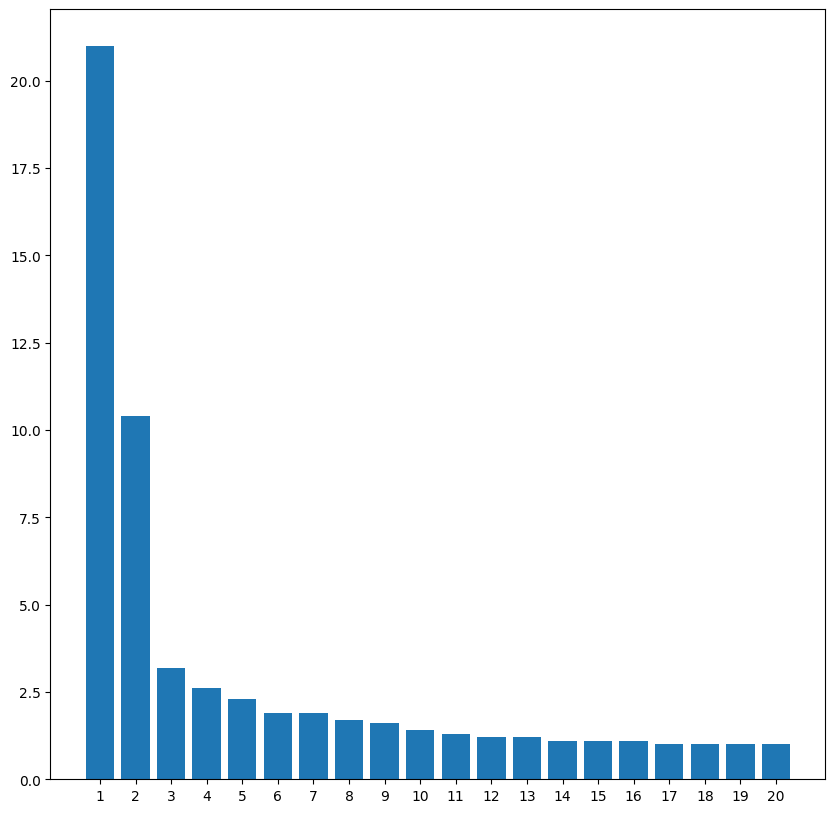

In [24]:
plt.figure(figsize=(10,10))
var = np.round(pca_20.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

# From the explained_variance_ratio we see that the first two features explain 31,46% of the viariance, afterwards the other features have ALL little impact to the variance of the whole dataset. I am going to choose 3 principal components for visualizations purposes. 

In [25]:
pca_20.explained_variance_ratio_.cumsum()

array([0.21031967, 0.31466753, 0.34670574, 0.37272664, 0.39549689,
       0.41483069, 0.43371509, 0.45069488, 0.46704377, 0.48112372,
       0.49423249, 0.5064836 , 0.51852038, 0.52990188, 0.54082933,
       0.55146927, 0.56182778, 0.57203972, 0.5819806 , 0.59156015])

In [29]:
data_20.shape

(6340, 20)

We are going to use k-means with 3 principal components. 

In [13]:
model = KMeans(n_clusters = 6, init = "k-means++")
label = model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
label.shape

(6340,)

In [16]:
label

array([4, 3, 4, ..., 0, 3, 5], dtype=int32)

In [17]:
data.shape

(6340, 3)

In [18]:
centers = np.array(model.cluster_centers_)

In [19]:
#each row in the centers is a cluster. 
centers

array([[ 1.70244926, -0.8334096 , -0.47554426],
       [-3.50808617,  0.55912642, -0.86831326],
       [ 0.26791496, -1.01317752,  0.36475119],
       [-0.56108366,  1.55284923,  0.74651316],
       [-1.63948867, -0.95547506,  0.38248021],
       [ 1.56136644,  1.72870111, -0.15454774]])

In [20]:
data = pd.DataFrame(data)

In [21]:
data.head(5)

,0,1,2
0,-2.250315,-0.231577,0.492742
1,0.567684,1.304886,0.967563
2,-0.927154,-0.900641,0.198404
3,-0.334368,0.070835,1.002965
4,-0.543855,-0.690317,1.273179


In [22]:
data['labels'] = label

In [23]:
data.rename(columns = {0:'PC1',1:'PC2',
                              2:'PC3'}, inplace = True)

In [24]:
data.head()

,PC1,PC2,PC3,labels
0,-2.250315,-0.231577,0.492742,4
1,0.567684,1.304886,0.967563,3
2,-0.927154,-0.900641,0.198404,4
3,-0.334368,0.070835,1.002965,2
4,-0.543855,-0.690317,1.273179,2


In [25]:
#6 labels. 
data['labels'].unique()

array([4, 3, 2, 1, 0, 5], dtype=int32)

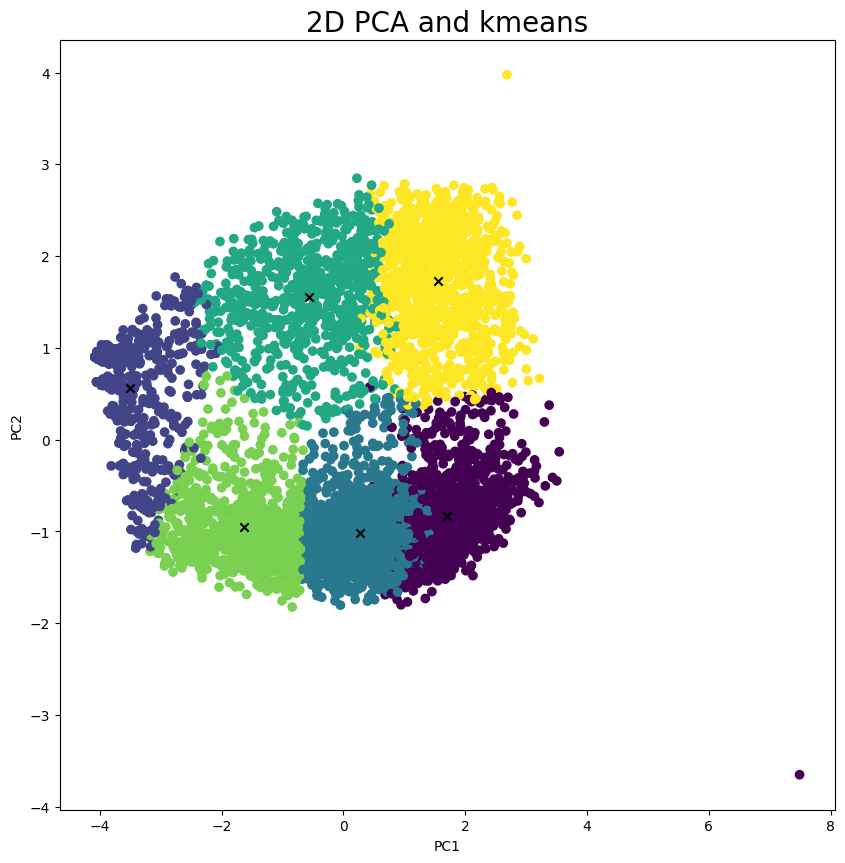

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(data['PC1'],data['PC2'], c = data['labels'])
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.title('2D PCA and kmeans', fontsize=20)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.legend()
plt.show()

In [27]:
x = data['PC1']
y = data['PC2']
z = data['PC3']
c = data['labels']

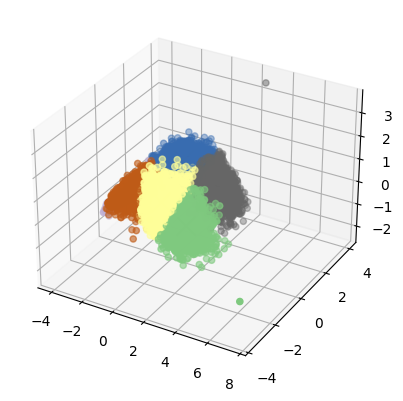

In [32]:
#3d dimensional plot with clusters by color. 
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z,c=c,cmap='Accent')
ax.scatter3D(centers[:, 0], centers[:, 1],centers[:, 2], s=200,marker="x", color='k');

ValueError: 'newcmp' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'o...